# 데이터

In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/My Drive/ADV/형용사/iri.csv',encoding='cp949')
data.head()

,대분류,소분류,point id,x,y,R,G,B,X,Y,Unnamed: 10,Unnamed: 11,x217 y219
0,NaN,NaN,0,53,419,255,243,114,-164,200,NaN,NaN,NaN
1,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN
2,NaN,NaN,2,139,377,244,166,159,-78,158,NaN,NaN,NaN
3,NaN,NaN,3,143,397,235,164,190,-74,178,NaN,NaN,NaN
4,NaN,NaN,4,187,373,178,229,197,-30,154,NaN,NaN,NaN


In [ ]:
data2 = pd.read_csv('/content/drive/My Drive/ADV/interbrand/interbrand.csv',encoding='cp949')
data2.head()

,names,Img,R,G,B,text color,로고 유형,비고,color_1,color_2,color_3,color_3.1,Unnamed: 12,Unnamed: 13
0,3M,https://www.interbrand.com/assets/00000001482.png,237,32,35,매치,1.0,NaN,237/32/35,NaN,NaN,NaN,NaN,NaN
1,Absolut,https://www.interbrand.com/assets/00000000005.png,14,80,157,매치,1.0,NaN,14/80/157,NaN,NaN,NaN,NaN,NaN
2,Accenture,https://www.interbrand.com/assets/00000001483.png,0,0,0,매치,4.0,다색,0/0/0,189/0/254,NaN,NaN,NaN,NaN
3,adidas,https://www.interbrand.com/assets/00000001484.png,0,0,0,매치,4.0,NaN,0/0/0,NaN,NaN,NaN,NaN,NaN
4,Adobe,https://www.interbrand.com/assets/00000001485.png,255,0,0,무채색,4.0,다색,254/0/0,0/0/0,NaN,NaN,NaN,NaN


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
x_train = data[['R','G','B']]
y_train = data['point id']

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
data2_knn = pd.DataFrame(knn.predict(data2[['R','G','B']]))
data2_knn.columns = ['knn predict']

res = pd.concat([data2,data2_knn], axis=1)
res.head()

,names,Img,R,G,B,text color,로고 유형,비고,color_1,color_2,color_3,color_3.1,Unnamed: 12,Unnamed: 13,knn predict
0,3M,https://www.interbrand.com/assets/00000001482.png,237,32,35,매치,1.0,NaN,237/32/35,NaN,NaN,NaN,NaN,NaN,37
1,Absolut,https://www.interbrand.com/assets/00000000005.png,14,80,157,매치,1.0,NaN,14/80/157,NaN,NaN,NaN,NaN,NaN,94
2,Accenture,https://www.interbrand.com/assets/00000001483.png,0,0,0,매치,4.0,다색,0/0/0,189/0/254,NaN,NaN,NaN,NaN,116
3,adidas,https://www.interbrand.com/assets/00000001484.png,0,0,0,매치,4.0,NaN,0/0/0,NaN,NaN,NaN,NaN,NaN,116
4,Adobe,https://www.interbrand.com/assets/00000001485.png,255,0,0,무채색,4.0,다색,254/0/0,0/0/0,NaN,NaN,NaN,NaN,37


* 데이터 조인

In [ ]:
mer = pd.merge(data,res,how='right',left_on='point id', right_on='knn predict')
mer.head()

,대분류,소분류,point id,x,y,R_x,G_x,B_x,X,Y,Unnamed: 10,Unnamed: 11,x217 y219,names,Img,R_y,G_y,B_y,text color,로고 유형,비고,color_1,color_2,color_3,color_3.1,Unnamed: 12,Unnamed: 13,knn predict
0,NaN,NaN,0,53,419,255,243,114,-164,200,NaN,NaN,NaN,Novartis,https://www.interbrand.com/assets/00000001267.png,255,214,76,매치,4.0,다색,7/133/173,242/104/42,255/213/76,NaN,NaN,NaN,0
1,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN,DHL,https://www.interbrand.com/assets/00000001504.png,255,204,0,매치,5.0,다색,214/4/17,255/204/0,NaN,NaN,NaN,NaN,1
2,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN,IKEA,https://www.interbrand.com/assets/00000001529.png,255,214,0,매치,5.0,다색,0/87/163,255/214/0,NaN,NaN,NaN,NaN,1
3,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN,Kakao,https://www.interbrand.com/assets/00000001707.png,254,205,0,매치,1.0,NaN,254/205/0,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN,McDonald's,https://www.interbrand.com/assets/00000001544.png,252,210,0,없음,2.0,NaN,255/212/0,NaN,NaN,NaN,NaN,NaN,1


In [ ]:
sam_mer = mer[['names','R_y','G_y','B_y','x','y','knn predict']]
sam_mer.columns=['names','R','G','B','x','y','knn predict']
sam_mer.head()

,names,R,G,B,x,y,knn predict
0,Novartis,255,214,76,53,419,0
1,DHL,255,204,0,95,373,1
2,IKEA,255,214,0,95,373,1
3,Kakao,254,205,0,95,373,1
4,McDonald's,252,210,0,95,373,1


## 좌표

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sam_iri = data[['point id','R','G','B','x','y']]

sam_iri.head()

,point id,R,G,B,x,y
0,0,255,243,114,53,419
1,1,241,219,1,95,373
2,2,244,166,159,139,377
3,3,235,164,190,143,397
4,4,178,229,197,187,373


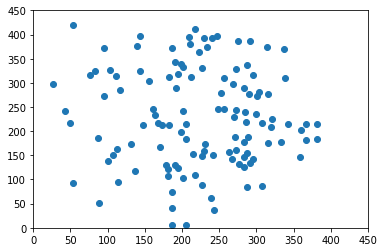

In [ ]:
# iri scale 좌표

plt.scatter(sam_iri.x,sam_iri.y)

plt.axis([0,450,0,450])
plt.show()

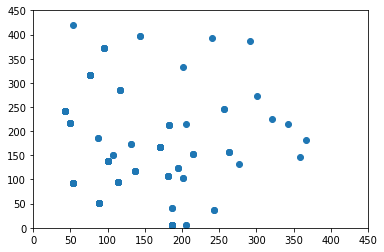

In [ ]:
# 로고 색을 knn으로 iri scale에 할당할 시 좌표


plt.scatter(sam_mer.x, sam_mer.y)
      
plt.axis([0,450,0,450])
plt.show()

* 형용사 데이터


In [ ]:
adj = pd.read_csv('/content/drive/My Drive/ADV/형용사/형용사.csv',encoding='cp949',engine = 'python')
adj.head()

,형용사,point id,x,y,X,Y,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,0,0.1,286,264
0,즐거운,1,113,436,-173,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,아기자기한,2,157,449,-129,185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,싱싱한,3,180,435,-106,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,신선한,4,201,423,-85,159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,밝은,5,201,445,-85,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sam_adj = adj[['형용사','point id','x','y']]
sam_adj.x = sam_adj.x.apply(lambda x: x-50)
sam_adj.y = sam_adj.y.apply(lambda y: y-50)
sam_adj['point id'] = sam_adj.index
sam_adj.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,형용사,point id,x,y
0,즐거운,0,63,386
1,아기자기한,1,107,399
2,싱싱한,2,130,385
3,신선한,3,151,373
4,밝은,4,151,395


In [ ]:
#폰트설정
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


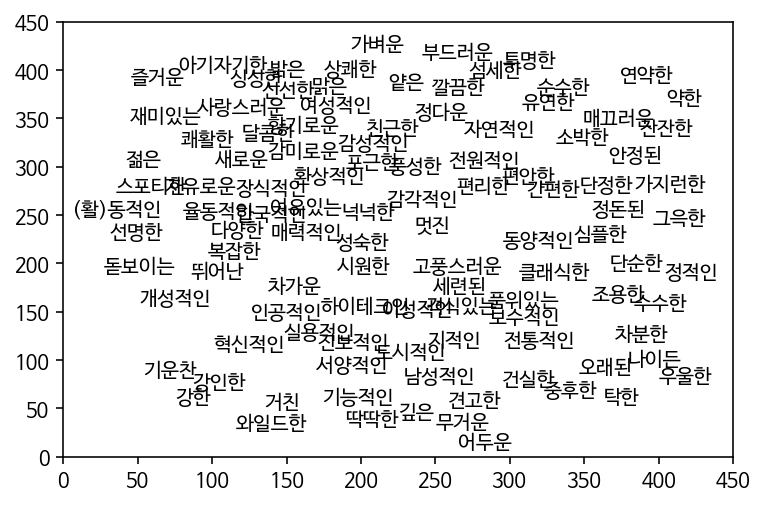

In [ ]:
for i in range(len(sam_adj)):
  plt.scatter(sam_adj.x[i],sam_adj.y[i],alpha=0)
  plt.text(sam_adj.x[i],sam_adj.y[i],sam_adj.loc[i,'형용사'], horizontalalignment='center')

plt.axis([0,450,0,450])
plt.show()

# color & 형용사 매핑

1. 형용사별 가장 가까운 색상

In [ ]:
from scipy.spatial import distance

In [ ]:
sam_adj.head(n=2)

,형용사,point id,x,y
0,즐거운,0,63,386
1,아기자기한,1,107,399


In [ ]:
sam_data.head(n=2)

,point id,R,G,B,x,y
0,0,255,243,114,53,419
1,1,241,219,1,95,373


In [ ]:
res = []
for i in range(len(sam_adj)):
  a_xy = sam_adj.loc[i,['x','y']]            # 형용사 하나의 x,y와
  uds = []
  for j in range(len(sam_data)):
    c_xy = sam_data.loc[j,['x','y']]         
    uds.append(distance.euclidean(c_xy, a_xy))          # 모든 iri 색상의 x,y의 유클리디안 거리를 계산
  res.append(uds.index(min(uds)))                       # 각 형용사별 가장 거리가 가까운 형용사의 인덱스를 저장

In [ ]:
len(sam_adj)

106

In [ ]:
len(res)               # 결과는 각 형용사 개수만큼

106

In [ ]:
sam_adj.head(n=5)

,형용사,point id,x,y
0,즐거운,0,63,386
1,아기자기한,1,107,399
2,싱싱한,2,130,385
3,신선한,3,151,373
4,밝은,4,151,395


In [ ]:
res[0:5]             # 형용사 1번~5번 예시) 각 형용사와 가장 거리가 가까운 iri 색깔의 인덱스 번호

[0, 1, 2, 2, 3]

In [ ]:
sam_adj['색상 할당'] = res
sam_adj.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,형용사,point id,x,y,색상 할당
0,즐거운,0,63,386,0
1,아기자기한,1,107,399,1
2,싱싱한,2,130,385,2
3,신선한,3,151,373,2
4,밝은,4,151,395,3


기업 데이터와 iri 색상 데이터와 형용사 데이터를 모두 merge

In [ ]:
sam_mer.head(n=2)

,names,R_y,G_y,B_y,x,y,knn predict
0,Novartis,255,214,76,53,419,0
1,DHL,255,204,0,95,373,1


In [ ]:
pd.merge(sam_mer,sam_adj,how='left',left_on='knn predict',right_on='색상 할당')[['names','R','G','B','knn predict','형용사']]

,names,R,G,B,knn predict,형용사
0,Novartis,255,214,76,0,즐거운
1,DHL,255,204,0,1,아기자기한
2,IKEA,255,214,0,1,아기자기한
3,Kakao,254,205,0,1,아기자기한
4,McDonald's,252,210,0,1,아기자기한
...,...,...,...,...,...,...
315,Hotel Shilla,73,67,59,118,무거운
316,Hotel Shilla,73,67,59,118,어두운
317,Netmarble Games,92,55,35,118,깊은
318,Netmarble Games,92,55,35,118,무거운


In [ ]:
pd.merge(sam_adj,sam_mer,how='left',left_on='색상 할당',right_on='knn predict')[['형용사','색상 할당','names','R','G','B','point id']]

,형용사,색상 할당,names,R,G,B,point id
0,즐거운,0,Novartis,255.0,214.0,76.0,0
1,아기자기한,1,DHL,255.0,204.0,0.0,1
2,아기자기한,1,IKEA,255.0,214.0,0.0,1
3,아기자기한,1,Kakao,254.0,205.0,0.0,1
4,아기자기한,1,McDonald's,252.0,210.0,0.0,1
...,...,...,...,...,...,...,...
290,무거운,118,Netmarble Games,92.0,55.0,35.0,102
291,견고한,110,NaN,NaN,NaN,NaN,103
292,어두운,118,Hotel Shilla,73.0,67.0,59.0,104
293,어두운,118,Netmarble Games,92.0,55.0,35.0,104


결과 데이터 다운

In [ ]:
# knn으로 predict한 데이터
mer.head(n=3)

,대분류,소분류,point id,x,y,R_x,G_x,B_x,X,Y,Unnamed: 10,Unnamed: 11,x217 y219,Unnamed: 0,names,sector,country,R_y,G_y,B_y,text color,hexcode,url,비고,H,S,V,knn predict
0,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN,72,Kakao,Technology,South Korea,254,205,0,매치,#fecd00,https://www.interbrand.com/assets/00000001707.png,NaN,48.425197,1.0,0.996078,1
1,NaN,NaN,1,95,373,241,219,1,-122,154,NaN,NaN,NaN,88,McDonald's,Restaurants,United States,252,210,0,없음,#fcd200,https://www.interbrand.com/assets/00000001544.png,NaN,50.000000,1.0,0.988235,1
2,NaN,NaN,3,143,397,235,164,190,-74,178,NaN,NaN,NaN,16,Barbie,Toys & Games,United States,240,120,181,매치,#f078b5,https://www.interbrand.com/assets/00000000021.png,NaN,329.500000,0.5,0.941176,3


In [ ]:
# sample knn predict 데이터
sam_mer.head(n=3)

,names,R_y,G_y,B_y,X,Y,knn predict,R,G,B
0,Kakao,254,205,0,-122,154,1,0.705556,0.569444,0.000000
1,McDonald's,252,210,0,-122,154,1,0.700000,0.583333,0.000000
2,Barbie,240,120,181,-74,178,3,0.666667,0.333333,0.502778


In [ ]:
mer.to_csv('iri_knn.csv', index=False)

In [ ]:
sam_mer.to_csv('sampe_iri_knn.csv', index=False)